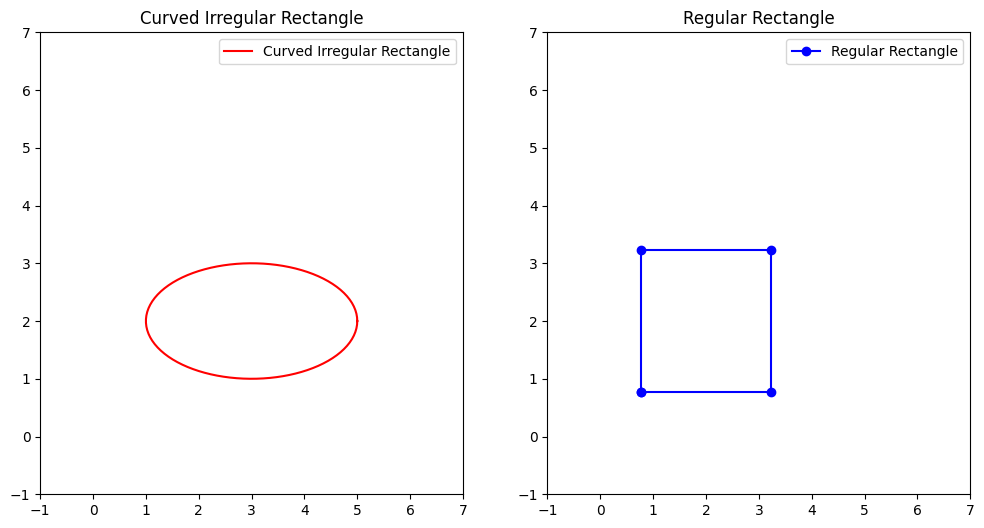

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib.patches import Polygon

# Define the curved irregular rectangle as a polyline
theta = np.linspace(0, 2 * np.pi, 100)
x_curve = 3 + 2 * np.cos(theta)  # Example curve along x-axis
y_curve = 2 + 1 * np.sin(theta)  # Example curve along y-axis
curved_rect = np.array([x_curve, y_curve]).T

# Function to calculate the area of a rectangle given four vertices
def rectangle_area(p1, p2, p3, p4):
    return 0.5 * abs((p1[0] * p2[1] + p2[0] * p3[1] + p3[0] * p4[1] + p4[0] * p1[1]) -
                     (p1[1] * p2[0] + p2[1] * p3[0] + p3[1] * p4[0] + p4[1] * p1[0]))

# Function to fit the curved rectangle to a regular rectangle
def fit_regular_rectangle(vertices):
    def objective_function(params):
        p1, p2, p3, p4 = np.reshape(params, (4, 2))
        area = rectangle_area(p1, p2, p3, p4)
        return abs(area - 6)  # Assume the desired area of the regular rectangle is 6 units

    # Initial guess for the rectangle vertices
    initial_guess = np.array([
        [1, 1], [3, 1], [3, 3], [1, 3]
    ]).flatten()

    result = minimize(objective_function, initial_guess, method='L-BFGS-B')
    fitted_vertices = np.reshape(result.x, (4, 2))
    return fitted_vertices

# Fit the curved rectangle to a regular rectangle
fitted_rect = fit_regular_rectangle(curved_rect)

# Define the regular rectangle for comparison
regular_rect = np.array([
    [1, 1],
    [3, 1],
    [3, 3],
    [1, 3],
    [1, 1]
])

# Plot both rectangles
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot curved irregular rectangle
axs[0].plot(curved_rect[:, 0], curved_rect[:, 1], 'r-', label='Curved Irregular Rectangle')
axs[0].set_title('Curved Irregular Rectangle')
axs[0].set_xlim(-1, 7)
axs[0].set_ylim(-1, 7)
axs[0].legend()

# Plot regular rectangle
axs[1].plot(*np.append(fitted_rect, [fitted_rect[0]], axis=0).T, 'bo-', label='Regular Rectangle')
axs[1].set_title('Regular Rectangle')
axs[1].set_xlim(-1, 7)
axs[1].set_ylim(-1, 7)
axs[1].legend()

plt.show()
